Exercise: Train a deep MLP on the MNIST dataset (you can load it using keras.datasets.mnist.load_data(). See if you can get over 98% precision. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.

In [38]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set()
sns.set_style('whitegrid')

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
print(X_valid.shape)
print(X_train.shape)

(5000, 28, 28)
(55000, 28, 28)


In [27]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [30]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 57us/sample - loss: 0.6117 - accuracy: 0.8376 - val_loss: 0.3073 - val_accuracy: 0.9146
Epoch 2/30
55000/55000 [==============================] - 3s 60us/sample - loss: 0.2838 - accuracy: 0.9190 - val_loss: 0.2342 - val_accuracy: 0.9370
Epoch 3/30
55000/55000 [==============================] - 4s 65us/sample - loss: 0.2303 - accuracy: 0.9337 - val_loss: 0.1977 - val_accuracy: 0.9426
Epoch 4/30
55000/55000 [==============================] - 3s 62us/sample - loss: 0.1972 - accuracy: 0.9428 - val_loss: 0.1738 - val_accuracy: 0.9504
Epoch 5/30
55000/55000 [==============================] - 3s 57us/sample - loss: 0.1724 - accuracy: 0.9507 - val_loss: 0.1571 - val_accuracy: 0.9570
Epoch 6/30
55000/55000 [==============================] - 3s 56us/sample - loss: 0.1529 - accuracy: 0.9558 - val_loss: 0.1431 - val_accuracy: 0.9590
Epoch 7/30
55000/55000 [==============================] -

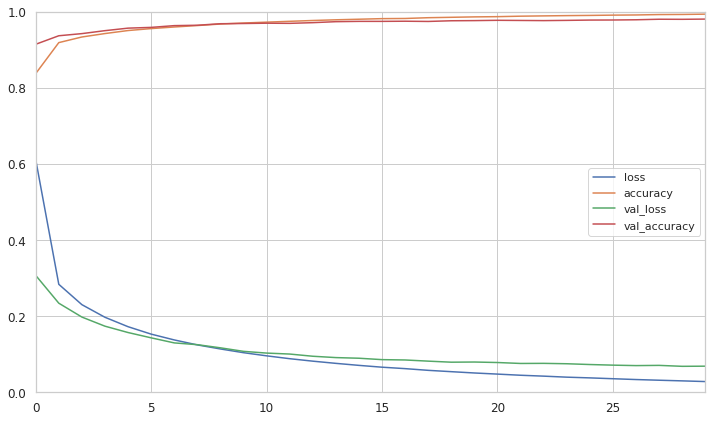

In [42]:
pd.DataFrame(history.history).plot(figsize=(12,7))
plt.gca().set_ylim(0,1);

In [40]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 31us/sample - loss: 12.5274 - accuracy: 0.9760


[12.527428275138233, 0.976]